Enter the number of dimensions: 2
Enter the distance: 3
Pairs with distance <= 3.0: [((98.4948413196755, 13.600142861688813), (99.15814555321067, 16.471623810286008)), ((56.81265796806969, 56.25707488553876), (57.156055975890965, 58.888088176676554)), ((26.332947868601085, 95.17147533842217), (27.330184460157692, 96.74893312665688)), ((28.69354371682945, 5.89186044959773), (31.057912110166942, 6.243153892035346)), ((1.8770829214549978, 86.42196833656568), (4.315310617742263, 87.32913819049666)), ((82.66052348024157, 31.167077123974362), (84.35787290680969, 33.13137661561314)), ((89.1750509507202, 72.92189428304661), (90.74017723397881, 75.38586613296773)), ((91.69976570304478, 47.9304754386514), (93.30729278960979, 49.6599650863517)), ((52.319031532200945, 22.091637363176698), (54.38178533673322, 24.21660886548207)), ((71.13969934547772, 5.199306525064317), (72.34866099446168, 6.830755498439944)), ((8.29137206683962, 82.54575519851248), (10.284691251205636, 84.21689300477739)), ((22.80

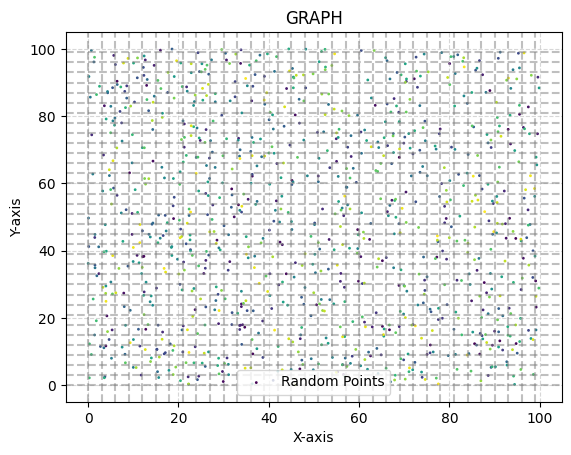

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def generate_random_points(num_points, d, range_limit):
    return np.random.rand(num_points, d) * range_limit

def calculate_grid_indices(points, cell_size):
    return np.floor(points / cell_size).astype(int)

def get_adjacent_cells(cell_index):
    adjacent_cells = []
    for neighbor_index in np.ndindex(*cell_index.shape):
        neighbor = cell_index + np.array(neighbor_index)
        if not np.array_equal(neighbor, cell_index):
            adjacent_cells.append(tuple(neighbor))
    return adjacent_cells

def find_close_pairs(points, r, cell_size):
    num_points = len(points)
    close_pairs = set()
    grid = {}
    grid_indices = calculate_grid_indices(points, cell_size)

    def euclidean_distance(point1, point2):
        return np.linalg.norm(point1 - point2)

    def get_pairs_in_cell(index):
        pairs = set()
        cell_key = tuple(index)

        if cell_key in grid:
            for neighbor_index in get_adjacent_cells(index):
                if not np.array_equal(neighbor_index, index):
                    for point_index in grid.get(neighbor_index, []):
                        distance = euclidean_distance(points[i], points[point_index])
                        if distance <= r:
                            pairs.add(tuple(sorted([(tuple(points[i])), (tuple(points[point_index]))])))
            grid[cell_key].append(i)
        else:
            grid[cell_key] = [i]
        return pairs

    for i in range(num_points):
        grid_indices = calculate_grid_indices(points[i], cell_size)
        close_pairs.update(get_pairs_in_cell(grid_indices))
    return list(close_pairs)

d = int(input("Enter the number of dimensions: "))
r = float(input("Enter the distance: "))
# For task number of points =1000 and coordinates lie between 0 and 100
num_points = 1000
range_limit = 100.0
cell_size = r
points = generate_random_points(num_points, d, range_limit)
grid_indices = calculate_grid_indices(points, cell_size)
plt.scatter(points[:, 0], points[:, 1], c=range(num_points), cmap='viridis', label='Random Points', s=1)
for i in np.arange(0, range_limit, r):
    plt.axvline(i, color='gray', linestyle='--', alpha=0.5)
    plt.axhline(i, color='gray', linestyle='--', alpha=0.5)
close_pairs = find_close_pairs(points, r, cell_size)
print(f'Pairs with distance <= {r}: {close_pairs}')
plt.title('GRAPH')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


Enter the number of dimensions: 3
Enter the threshold distance: 50
Pairs with distance <= 50.0: [((37.31129045916305, 27.673376559378205, 48.732627154535265), (58.23957448903647, 58.54543502917592, 61.48388727009982)), ((37.12739958394795, 35.893502730533896, 35.15410132567515), (62.33283397848696, 53.516686381523634, 63.3369939571286)), ((33.40276420259559, 40.01397454037626, 39.73034701315129), (62.33283397848696, 53.516686381523634, 63.3369939571286)), ((29.12030759445837, 34.88439425202666, 46.30812509736095), (58.23957448903647, 58.54543502917592, 61.48388727009982)), ((47.72803452128018, 25.26902991291814, 31.914814095972275), (62.33283397848696, 53.516686381523634, 63.3369939571286)), ((30.92054894324294, 43.993094952944624, 49.455150173278405), (63.20366703552348, 66.52469617102923, 62.998998297459416)), ((32.61508837895738, 39.14963465548348, 18.844983231797386), (63.860263814130214, 54.01291875845746, 52.46949799867428)), ((21.607520841897767, 38.684133418086034, 41.676073557

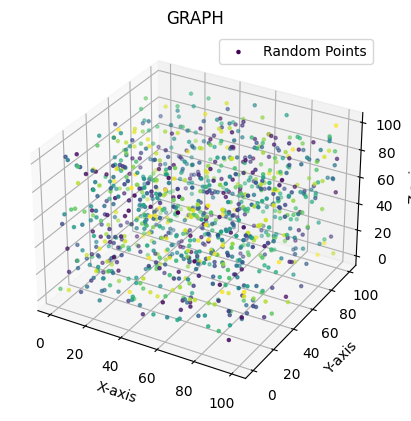

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def generate_random_points(num_points, d, range_limit):
    return np.random.rand(num_points, d) * range_limit

def calculate_grid_indices(points, cell_size):
    return np.floor(points / cell_size).astype(int)

def get_adjacent_cells(cell_index):
    adjacent_cells = []
    for neighbor_index in np.ndindex(*cell_index.shape):
        neighbor = cell_index + np.array(neighbor_index)
        if not np.array_equal(neighbor, cell_index):
            adjacent_cells.append(tuple(neighbor))
    return adjacent_cells

def find_close_pairs(points, r, cell_size):
    num_points = len(points)
    close_pairs = set()
    grid = {}
    grid_indices = calculate_grid_indices(points, cell_size)

    def euclidean_distance(point1, point2):
        return np.linalg.norm(point1 - point2)

    def get_pairs_in_cell(index):
        pairs = set()
        cell_key = tuple(index)

        if cell_key in grid:
            for neighbor_index in get_adjacent_cells(index):
                if not np.array_equal(neighbor_index, index):
                    for point_index in grid.get(neighbor_index, []):
                        distance = euclidean_distance(points[i], points[point_index])
                        if distance <= r:
                           pairs.add(tuple(sorted([(tuple(points[i])), (tuple(points[point_index]))])))
            grid[cell_key].append(i)
        else:
            grid[cell_key] = [i]
        return pairs

    for i in range(num_points):
        grid_indices = calculate_grid_indices(points[i], cell_size)
        close_pairs.update(get_pairs_in_cell(grid_indices))
    return list(close_pairs)

d = int(input("Enter the number of dimensions: "))
r = float(input("Enter the threshold distance: "))
# For task  number of points and range of coordinates are fixed
num_points = 1000
range_limit = 100.0
cell_size = r
points = generate_random_points(num_points, d, range_limit)
grid_indices = calculate_grid_indices(points, cell_size)
#Taken Help from google to plot in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=range(num_points), cmap='viridis', label='Random Points', s=5)
close_pairs = find_close_pairs(points, r, cell_size)
print(f'Pairs with distance <= {r}: {close_pairs}')
ax.set_title('GRAPH')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [30]:
import numpy as np

def generate_random_points(num_points, d, range_limit):
    return np.random.rand(num_points, d) * range_limit

def calculate_grid_indices(points, cell_size):
    return np.floor(points / cell_size).astype(int)

def get_adjacent_cells(cell_index):
    adjacent_cells = []
    for neighbor_index in np.ndindex(*cell_index.shape):
        neighbor = cell_index + np.array(neighbor_index)
        if not np.array_equal(neighbor, cell_index):
            adjacent_cells.append(tuple(neighbor))
    return adjacent_cells

def find_close_pairs(points, r, cell_size):
    num_points = len(points)
    close_pairs = set()
    grid = {}
    grid_indices = calculate_grid_indices(points, cell_size)

    def euclidean_distance(point1, point2):
        return np.linalg.norm(point1 - point2)

    def get_pairs_in_cell(index):
        pairs = set()
        cell_key = tuple(index)

        if cell_key in grid:
            for neighbor_index in get_adjacent_cells(index):
                if not np.array_equal(neighbor_index, index):
                    for point_index in grid.get(neighbor_index, []):
                        distance = euclidean_distance(points[i], points[point_index])
                        if distance <= r:
                            pairs.add(tuple(sorted([(tuple(points[i])), (tuple(points[point_index]))])))
            grid[cell_key].append(i)
        else:
            grid[cell_key] = [i]
        return pairs

    for i in range(num_points):
        grid_indices = calculate_grid_indices(points[i], cell_size)
        close_pairs.update(get_pairs_in_cell(grid_indices))
    return list(close_pairs)

d = int(input("Enter the number of dimensions: "))
r = float(input("Enter the distance: "))
# For task number of points =1000 and coordinates lie between 0 and 100
num_points = 1000
range_limit = 100.0
cell_size = r
points = generate_random_points(num_points, d, range_limit)
grid_indices = calculate_grid_indices(points, cell_size)
close_pairs = find_close_pairs(points, r, cell_size)
print(f'Pairs with distance <= {r}: {close_pairs}')



Enter the number of dimensions: 4
Enter the distance: 50
Pairs with distance <= 50.0: [((40.46604759190542, 41.77245510950741, 43.525284836302944, 37.97856343061942), (63.83490758432953, 69.54365925338905, 60.95226188482885, 64.17938248810728)), ((40.46604759190542, 41.77245510950741, 43.525284836302944, 37.97856343061942), (52.65448606738015, 63.36103516818131, 68.7354298607259, 57.65389415483586))]


In [32]:
import numpy as np

def generate_random_points(num_points, d, range_limit):
    return np.random.rand(num_points, d) * range_limit

def calculate_grid_indices(points, cell_size):
    return np.floor(points / cell_size).astype(int)

def get_adjacent_cells(cell_index):
    adjacent_cells = []
    for neighbor_index in np.ndindex(*cell_index.shape):
        neighbor = cell_index + np.array(neighbor_index)
        if not np.array_equal(neighbor, cell_index):
            adjacent_cells.append(tuple(neighbor))
    return adjacent_cells

def find_close_pairs(points, r, cell_size):
    num_points = len(points)
    close_pairs = set()
    grid = {}
    grid_indices = calculate_grid_indices(points, cell_size)

    def euclidean_distance(point1, point2):
        return np.linalg.norm(point1 - point2)

    def get_pairs_in_cell(index):
        pairs = set()
        cell_key = tuple(index)

        if cell_key in grid:
            for neighbor_index in get_adjacent_cells(index):
                if not np.array_equal(neighbor_index, index):
                    for point_index in grid.get(neighbor_index, []):
                        distance = euclidean_distance(points[i], points[point_index])
                        if distance <= r:
                            pairs.add(tuple(sorted([(tuple(points[i])), (tuple(points[point_index]))])))
            grid[cell_key].append(i)
        else:
            grid[cell_key] = [i]
        return pairs

    for i in range(num_points):
        grid_indices = calculate_grid_indices(points[i], cell_size)
        close_pairs.update(get_pairs_in_cell(grid_indices))
    return list(close_pairs)

d = int(input("Enter the number of dimensions: "))
r = float(input("Enter the distance: "))
# For task number of points =1000 and coordinates lie between 0 and 100
num_points = 1000
range_limit = 100.0
cell_size = r
points = generate_random_points(num_points, d, range_limit)
grid_indices = calculate_grid_indices(points, cell_size)
close_pairs = find_close_pairs(points, r, cell_size)
print(f'Pairs with distance <= {r}: {close_pairs}')



Enter the number of dimensions: 10
Enter the distance: 70
Pairs with distance <= 70.0: []
